**UTS Penambangan Data dan Analisis Bisnis [Bagian B]**

Dataset Titanic: Machine Learning from Disaster adalah dataset populer dari Kaggle yang digunakan untuk memprediksi kemungkinan selamatnya penumpang kapal Titanic berdasarkan berbagai fitur penumpang seperti umur, jenis kelamin, kelas tiket, dan sebagainya.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
# Eksplorasi Awal
---

### a. Berapa jumlah total penumpang dalam data?
---

In [112]:
total_penumpang = len(df)
print("Jumlah total penumpang:", total_penumpang)

Jumlah total penumpang: 891


---
### b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.
---

In [105]:
survived_count = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
survived_df = survived_count.reset_index()
survived_df.columns = ['Status', 'Jumlah']
survived_df

,Status,Jumlah
0,Tidak Selamat,549
1,Selamat,342


<ipython-input-106-24db15b72c7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Paired')


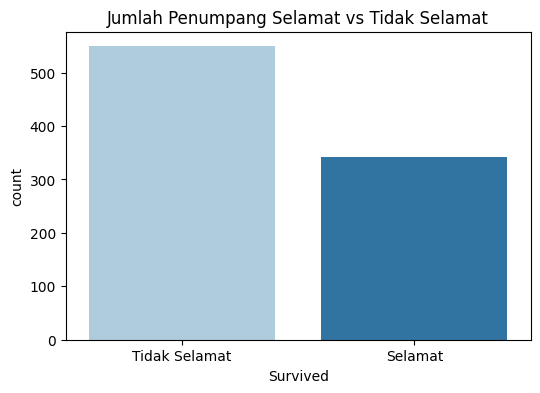

In [106]:
# Visualisasi (b. Jumlah penumpang yang selamat dan tidak selamat)
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Paired')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.show()

**Penjelasan:** berdasarkan hasil tabel dan grafik di atas, didapat jumlah penumpang yang selamat yaitu 549 orang, sedangkan jumlah penumpang yang tidak selamat yaitu 342 orang.

---
### c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?
---

In [107]:
rata_rata_umur = df['Age'].mean()
print(f"\nRata-rata umur penumpang: {rata_rata_umur:.2f} tahun\n")

penumpang_termuda = df.loc[df['Age'].idxmin()]
print("Penumpang termuda:")
print(penumpang_termuda[['Name', 'Age', 'Sex']])
print("\n")

penumpang_tertua = df.loc[df['Age'].idxmax()]
print("Penumpang tertua:")
print(penumpang_tertua[['Name', 'Age', 'Sex']])


Rata-rata umur penumpang: 29.70 tahun

Penumpang termuda:
Name    Thomas, Master. Assad Alexander
Age                                0.42
Sex                                male
Name: 803, dtype: object


Penumpang tertua:
Name    Barkworth, Mr. Algernon Henry Wilson
Age                                     80.0
Sex                                     male
Name: 630, dtype: object


---
### d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan
---

In [108]:
jumlah_kelamin = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(jumlah_kelamin)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


<ipython-input-109-a3e372dcedb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='coolwarm')


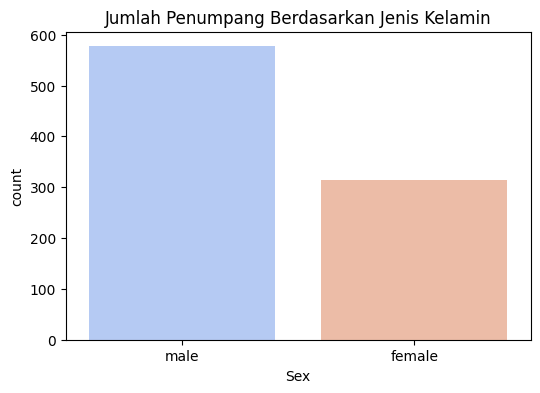

In [109]:
# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

---
### e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan
---

In [110]:
jumlah_kelas = df['Pclass'].value_counts().sort_index()

persen_kelas1 = (jumlah_kelas[1] / total_penumpang) * 100

kelas_df = jumlah_kelas.reset_index()
kelas_df.columns = ['Kelas', 'Jumlah']
kelas_df['Persentase'] = (kelas_df['Jumlah'] / total_penumpang * 100).round(2)
print("\nTabel jumlah dan persentase penumpang berdasarkan kelas:")
print(kelas_df)


Tabel jumlah dan persentase penumpang berdasarkan kelas:
   Kelas  Jumlah  Persentase
0      1     216       24.24
1      2     184       20.65
2      3     491       55.11


<ipython-input-111-e33d15454404>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='viridis')


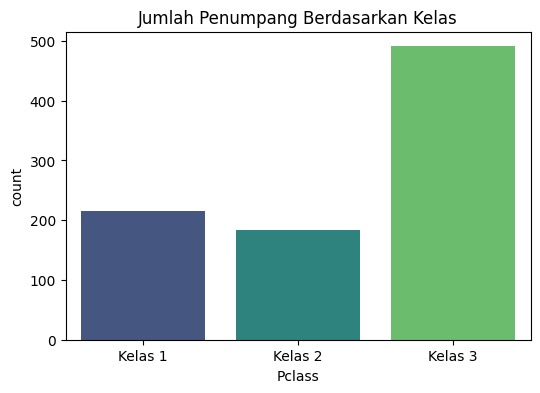

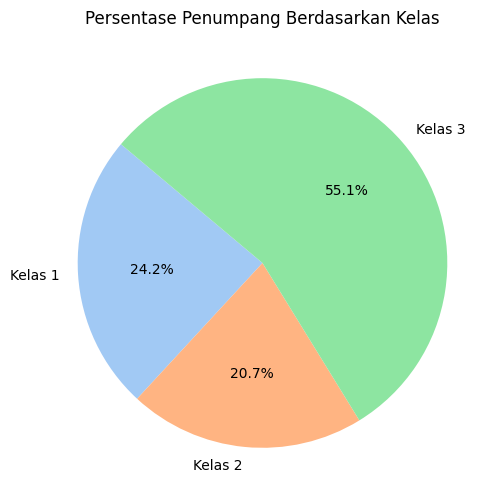

In [111]:
# Visualisasi (e. Jumlah penumpang berdasarkan kelas dan persen kelas 1)
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xticks([0, 1, 2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])
plt.show()

## Pie chart
plt.figure(figsize=(6,6))
plt.pie(jumlah_kelas, labels=['Kelas 1', 'Kelas 2', 'Kelas 3'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Penumpang Berdasarkan Kelas')
plt.show()

**Penjelasan:** berdasarkan tabel dan grafik, diketahui bahwa total data yang berada di kelas 1 yaitu 24,24%

---
# Preprocessing
---

### a. Apakah terdapat *missing value* pada data tersebut?
---

In [115]:
missing_values = df.isnull().sum()
print("Jumlah missing value per kolom:")
print(missing_values)

Jumlah missing value per kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Penjelasan:** berdasarkan hasil di atas, artinya data memiliki *missing value* pada kolom *'Age'* sebanyak 177, *'Cabin'* sebanyak 687, dan *'Embarked'* sebanyak 2.

---
### b. Jika terdapat *missing value*, apa yang harus dilakukan?
---

- Kolom *'Age'* → bisa diisi dengan mean atau median

- Kolom *'Cabin'* → bisa dihapus atau diproses lebih lanjut (misal ambil hanya huruf dek)

- Kolom *'Embarked'* → bisa diisi dengan modus

In [116]:
# Imputasi 'Age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Hapus 'Cabin' karena terlalu banyak missing
df.drop(columns=['Cabin'], inplace=True)

# Imputasi 'Embarked' dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-116-da3da47d41d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-116-da3da47d41d4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

---
### c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!
---

**Outlier** adalah nilai yang secara signifikan berbeda dari mayoritas data. Bisa dilihat dengan boxplot atau z-score.

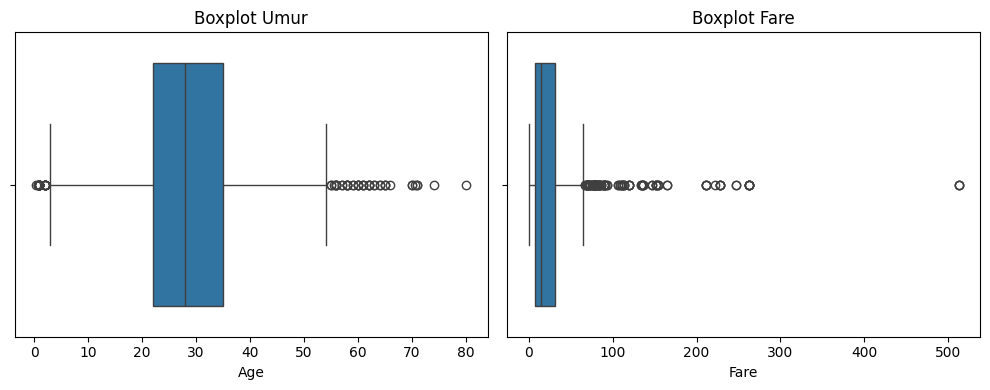

In [117]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot Umur')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot Fare')

plt.tight_layout()
plt.show()

**Penjelasan:** dari boxplot di atas, dapat disimpulkan bahwa data terdapat outlier.

---
### d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?
---

**Boxplot Umur:** rentang umur mayoritas penumpang berada di antara sekitar 20 hingga 40 tahun. *Outliernya* yaitu titik-titik di luar batas (di atas sekitar 60 tahun). Umur 60–80 tahun masih wajar untuk manusia, jadi kemungkinan tidak perlu dihapus, kecuali ada alasan statistik kuat.

**Boxplot Fare:** mayoritas penumpang membayar tarif (Fare) di bawah 100, tapi terlihat ada beberapa nilai ekstrem hingga >500. Ini bisa jadi outlier numerik, tetapi perlu dicek konteksnya: Apakah itu karena mereka berada di kelas 1? Apakah tiket dibeli dalam grup?



In [118]:
# Menghapus outlier ekstrem Fare di atas kuartil 3 + 1.5*IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR

df = df[df['Fare'] <= batas_atas]

---
### e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?
---

In [119]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik
fitur_numerik = ['Age', 'Fare']
scaler = StandardScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

<ipython-input-119-1ddbe7b3ab8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])


---
# Modelling
---

### a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.  
---

**Proses Pembagian Data Training dan Testing**
Proses pembagian data dilakukan dengan cara memisahkan dataset menjadi dua bagian utama:

1. Data Training: digunakan untuk melatih model agar dapat mengenali pola dari data.

2. Data Testing: digunakan untuk mengukur performa model terhadap data yang belum pernah dilihat sebelumnya oleh model, sehingga bisa diketahui apakah model benar-benar memahami pola atau hanya menghafal data latih.

**Mengapa perlu dibagi?**
Agar model bisa belajar (training) dari sebagian data dan diuji (testing) pada data yang belum pernah dilihat sebelumnya. Tujuannya agar kita tahu performa model secara realistis, bukan hanya sekadar "hafalan".

In [120]:
from sklearn.model_selection import train_test_split

# Misal kita pakai fitur-fitur yang sudah diproses sebelumnya
X = df.drop(columns=['Survived'])
y = df['Survived']

# Encoding categorical variables jika ada (Sex, Embarked, dsb)
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---
### b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?  
---

Data dibagi dengan proporsi 80% untuk training dan 20% untuk testing. Proporsi ini dianggap seimbang karena cukup banyak data untuk melatih model dan cukup juga untuk mengujinya secara objektif. Pembagian ini penting untuk menghindari overfitting, yaitu kondisi saat model terlalu cocok dengan data training tetapi gagal saat diuji dengan data baru.

---
### c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya  
---

**1. Logistic Regression** adalah model statistik yang digunakan untuk memprediksi dua kelas (misalnya: selamat atau tidak selamat) berdasarkan input fitur.

Cara Kerja:
- Menghitung probabilitas seseorang berada dalam satu kelas menggunakan fungsi sigmoid/logistik.

- Jika probabilitas > 0.5 → diprediksi sebagai kelas 1 (selamat), jika tidak → kelas 0 (tidak selamat).

- Sangat efektif untuk data linier dan mudah ditafsirkan.

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**2. Decision Tree** (pohon keputusan) adalah model berbentuk pohon yang membuat keputusan secara bertahap, berdasarkan pertanyaan ya/tidak pada fitur.

Cara Kerja:
- Memilih fitur yang paling memisahkan data (misal: jenis kelamin, usia, atau kelas tiket).

- Membagi data ke dalam cabang-cabang berdasarkan nilai fitur tersebut.

- Proses berlanjut hingga setiap cabang menghasilkan prediksi akhir (daun pohon).

- Mudah dimengerti karena menyerupai logika “jika-maka”.



In [122]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**3. Random Forest** adalah model ensemble yang menggabungkan banyak Decision Tree untuk membuat prediksi yang lebih kuat dan akurat.

Cara Kerja:
- Membuat banyak pohon keputusan dengan subset data dan fitur yang berbeda (random sampling).

- Setiap pohon memberi "suara" untuk prediksi, dan hasil akhir diambil dari mayoritas suara.

- Lebih stabil dan akurat dibandingkan satu pohon saja, serta tahan terhadap overfitting.

In [123]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

---
### d. Berapa nilai  evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi  tersebut?  
---

**Penjelasan metrik:**

- Accuracy → persentase banyak prediksi yang benar dari seluruh data

- Precision → persentase yang benar-benar selaat dari semua prediksi "selamat"

- Recall → persentase yang berhasil diprediksi selamat dari semua yang benar-benar selamat

- F1-Score → harmonisasi antara precision dan recall (berguna jika data tidak seimbang)

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {'LogReg': logreg, 'DecisionTree': tree, 'RandomForest': forest}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score : {f1_score(y_test, y_pred):.2f}")


Model: LogReg
Accuracy : 0.77
Precision: 0.72
Recall   : 0.65
F1-Score : 0.68

Model: DecisionTree
Accuracy : 0.81
Precision: 0.83
Recall   : 0.63
F1-Score : 0.72

Model: RandomForest
Accuracy : 0.79
Precision: 0.87
Recall   : 0.55
F1-Score : 0.67


**Penjelasan:**

1. Model: Logistic Regression
 - Accuracy (0.77): model berhasil memprediksi 77% dari total data uji dengan benar.

 - Precision (0.72): dari semua penumpang yang diprediksi selamat, 72% benar-benar selamat.

 - Recall (0.65): dari semua penumpang yang benar-benar selamat, hanya 65% yang berhasil diprediksi oleh model.

 - F1-Score (0.68): gabungan antara precision dan recall. Nilai sedang, menunjukkan model cukup seimbang, tapi recall-nya masih agak rendah.

2. Model: Decision Tree
 - Accuracy (0.81): paling tinggi di antara ketiga model. Berarti 81% prediksi model benar.

 - Precision (0.83): dari prediksi "selamat", 83% benar.

 - Recall (0.63): sedikit lebih rendah dari Logistic Regression, artinya model ini cenderung lebih yakin saat memprediksi, tapi juga lebih konservatif (tidak banyak memprediksi "selamat").

 - F1-Score (0.72): lebih baik dari Logistic Regression, karena precision tinggi mengangkat nilai F1.

3. Model: Random Forest
 - Accuracy (0.79): tidak setinggi Decision Tree, tapi masih cukup bagus.

 - Precision (0.87): paling tinggi dari ketiga model. Artinya prediksi "selamat" sangat bisa dipercaya.

 - Recall (0.55): model ini cenderung hanya memprediksi “selamat” jika benar-benar yakin, sehingga banyak penumpang yang selamat tidak terdeteksi.

 - F1-Score (0.67): turun karena recall yang rendah.



---
### e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.
---

- Decision Tree menghasilkan akurasi dan F1-Score tertinggi dari ketiga model. Ini menunjukkan model ini mampu memberikan prediksi yang cukup seimbang antara precision dan recall.

- Random Forest memiliki precision tertinggi (0.87), tapi recall-nya rendah (0.55). Artinya, model ini sangat yakin saat memprediksi seseorang selamat, tapi sering gagal mengenali semua penumpang yang sebenarnya selamat.

- Logistic Regression paling seimbang antara precision dan recall, tapi performanya sedikit di bawah Decision Tree.

Kesimpulan: Decision Tree merupakan model terbaik. Kemungkinan karena fitur-fitur seperti jenis kelamin, kelas tiket, dan umur memiliki struktur yang mudah dipetakan secara biner. Decision Tree secara alami bagus dalam menangkap aturan-aturan logis seperti "Jika wanita dan kelas 1 → kemungkinan besar selamat." Random Forest justru mungkin terlalu overfit terhadap data train atau tidak cukup menangkap struktur umum dalam data test.

---
# Evaluasi
---

### a.  Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?
---

Berdasarkan hasil model terbaik berdasarkan akurasi tertinggi yaitu Decision Tree, diketahui bahwa nilai precision adalah 83% dan nilai recall adalah 63% untuk prediksi penumpang yang "selamat".

---
### b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya yang benar-benar selamat?
---

In [125]:
y_pred_tree = tree.predict(X_test)

# Total penumpang yang diprediksi selamat oleh Decision Tree
predicted_selamat = sum(y_pred_tree == 1)

# Dari prediksi tersebut, yang benar-benar selamat (True Positives)
true_selamat = sum((y_pred_tree == 1) & (y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah yang benar-benar selamat: {true_selamat}")

Jumlah penumpang yang diprediksi selamat: 46
Jumlah yang benar-benar selamat: 38
